#### 4) This question should be answered using the `Weekly` data set, which is part of the `ISLR2` package. This data is similar in nature to the `Smarket` data examined in the book (Ch4, lab). First, load the dataset:


 https://book.huihoo.com/introduction-to-statistical-learning/data.html

 Link for getting rdataset into python:
 https://www.statsmodels.org/dev/datasets/statsmodels.datasets.get_rdataset.html


 By using the below command you can get the ISLR dataset
 `sm.datasets.get_rdataset('Weekly', 'ISLR').data`

#### a) Produce some numerical and graphical summaries of the `Weekly` data. Can you identify any patterns? Hint: examine the __correlation__ between predictors.

**Importing Libraries:**

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

**Loading dataset:**

In [2]:
data = sm.datasets.get_rdataset('Weekly', 'ISLR').data
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
Data = data.copy()

**Pre Processing** (Did not train nor test)

In [4]:
# data.isnull()
data.info()
# print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [5]:
data = data.drop('Direction', axis=1)

In [6]:
ProcessedData = data.copy()
#ProcessedData.head()

**Pair Plot, Graphical summary**

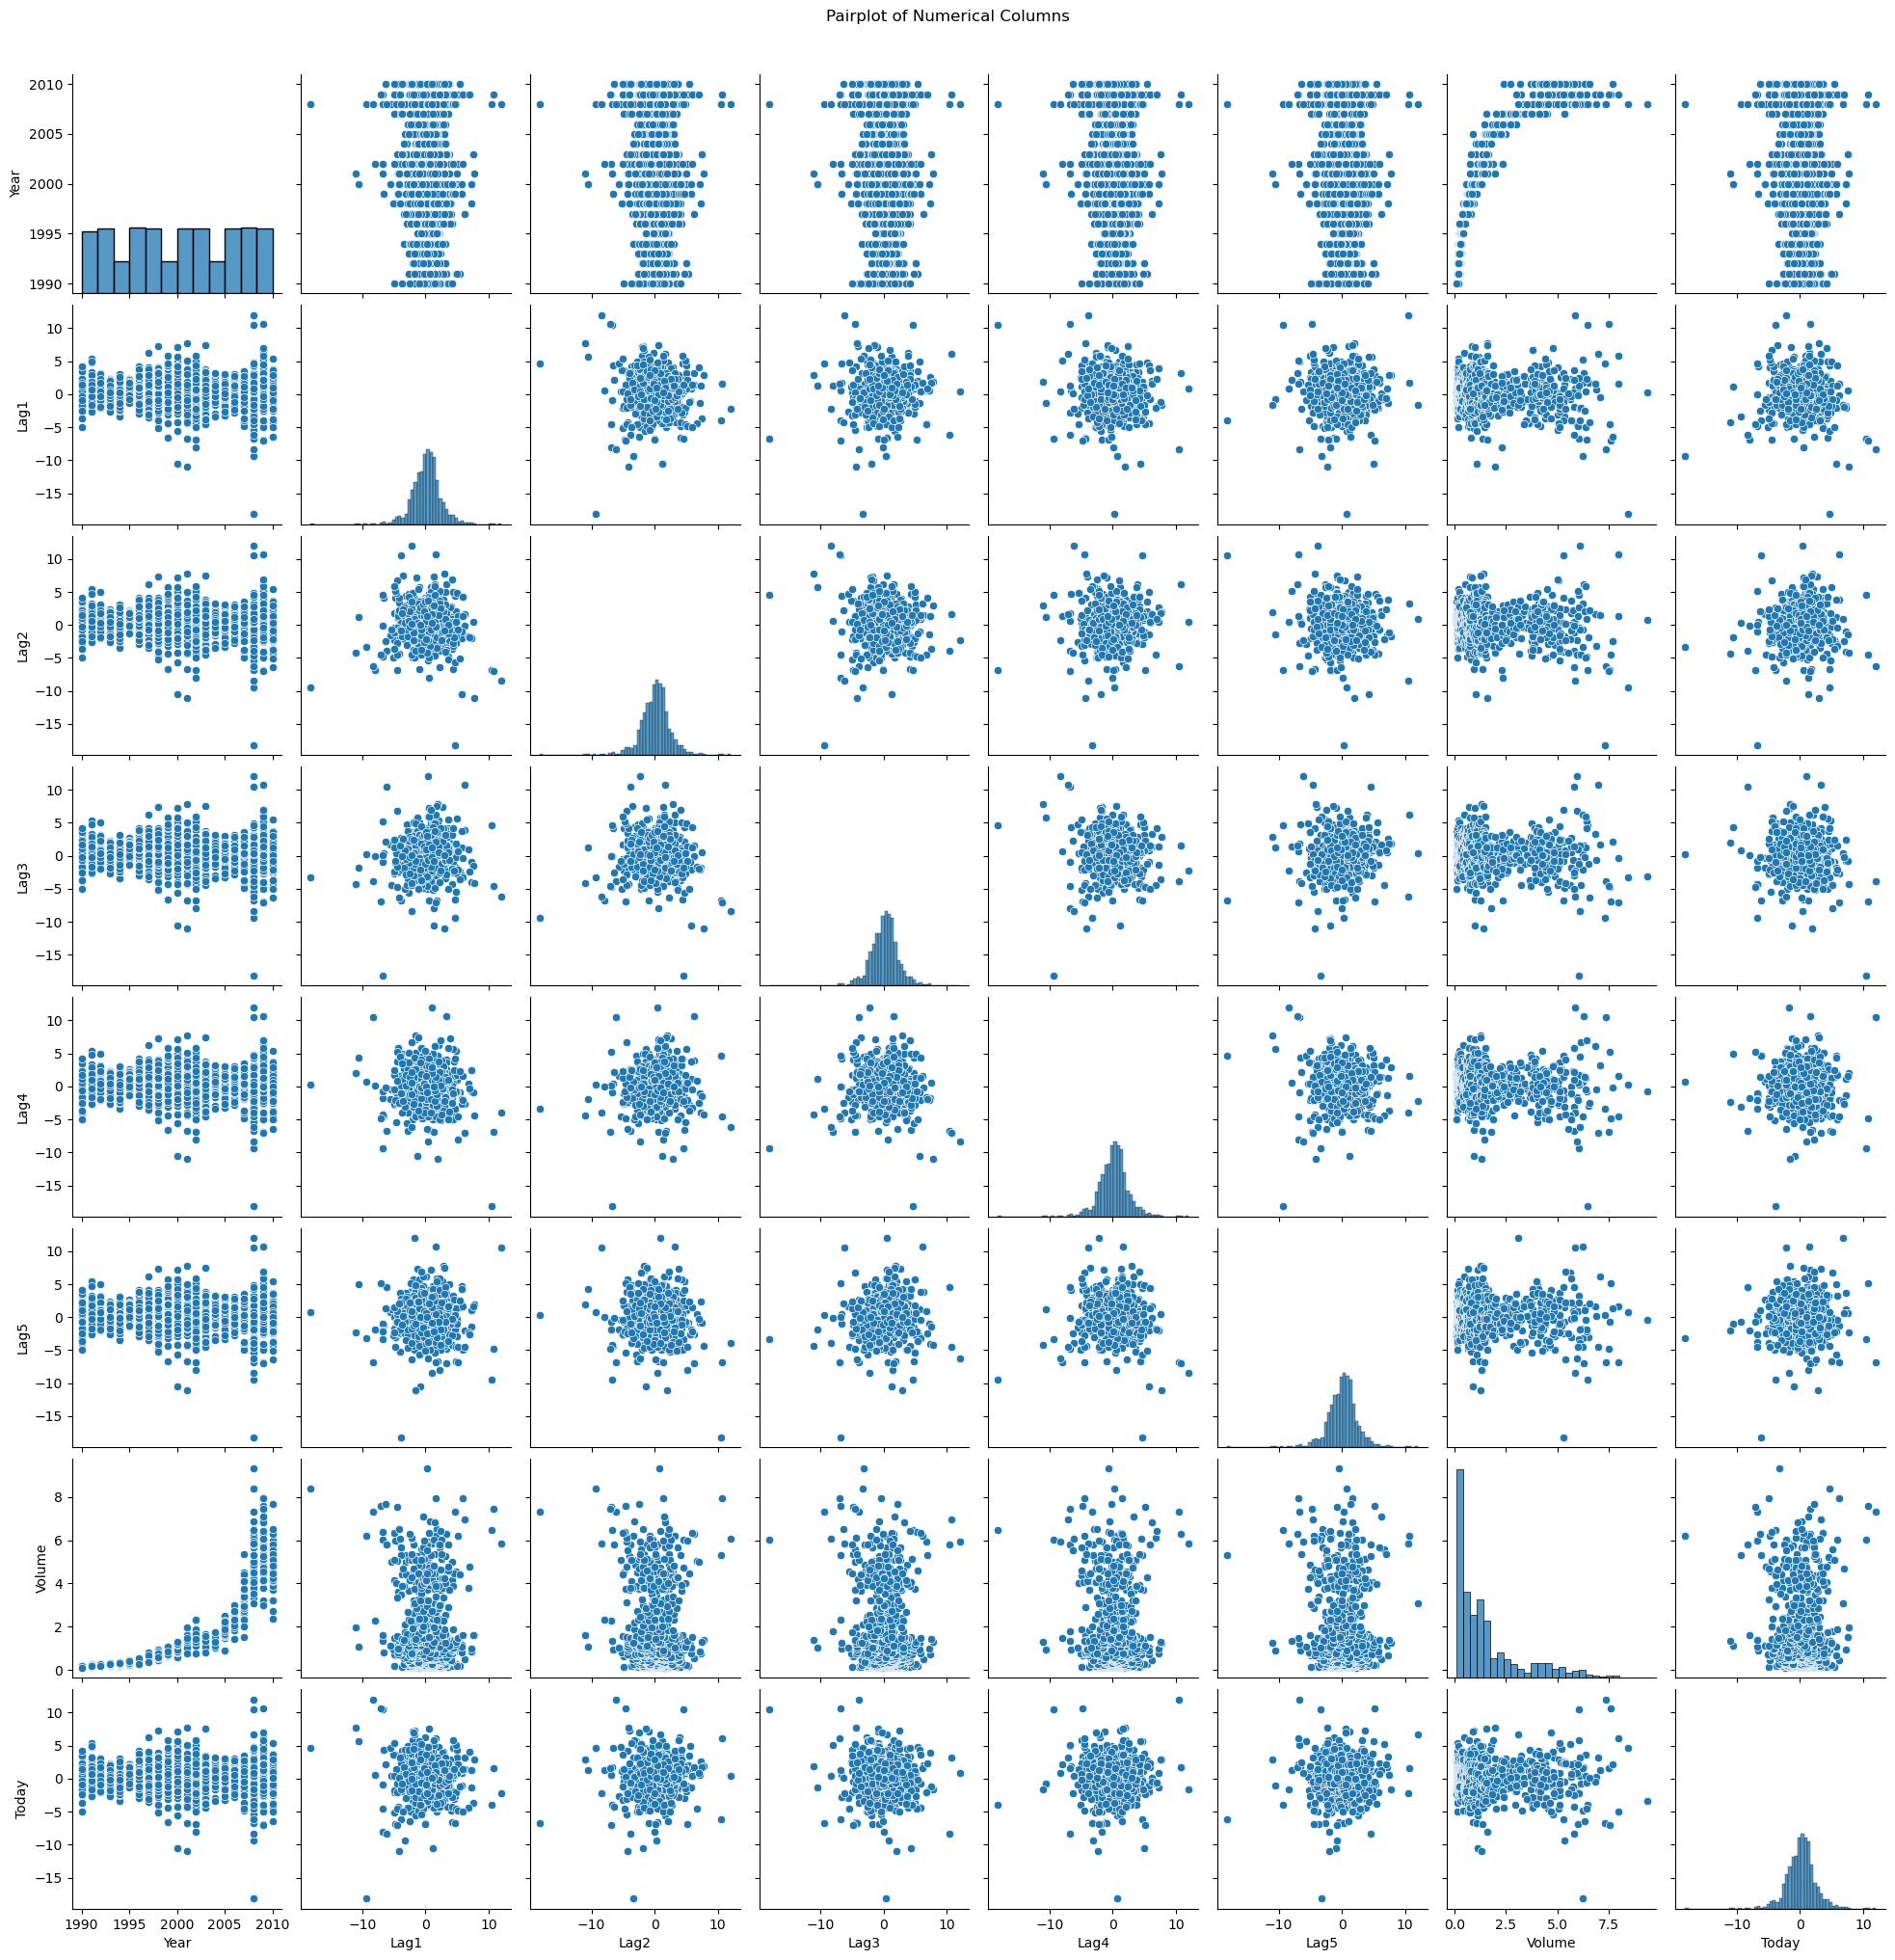

In [7]:
sns.pairplot(ProcessedData, diag_kind='hist')
plt.suptitle("Pairplot of Numerical Columns", y=1.02)
plt.show()

**Numerical Summary**

In [8]:
ProcessedData.describe() 

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [9]:
CorrelationMatrix = ProcessedData.corr()
print(CorrelationMatrix)

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000  


<Axes: >

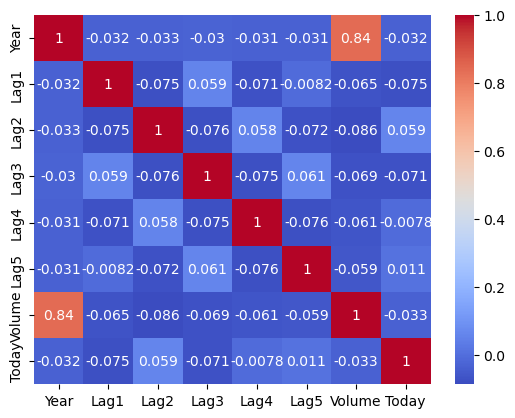

In [10]:
sns.heatmap(CorrelationMatrix, annot=True, cmap="coolwarm")

**Observing Patterns**
- There is a strong positive correlation (0.84) between the 'Year' and 'Volume' variables. This suggests that as the 'Year' increases, the 'Volume' tends to increase as well.
- There are moderate negative correlations between 'Lag1', 'Lag2', 'Lag3', 'Lag4', and 'Lag5'. This suggests that as the values of one lag increase, the values of the other lags tend to decrease.
- The correlations between 'Year' and the lag variables ('Lag1' to 'Lag5') are relatively weak, ranging from -0.03 to 0.06.
- There is a weak negative correlation between 'Lag2' and 'Today' (-0.07). This suggests a slight tendency for 'Today' to decrease as 'Lag2' increases.
- There is a weak negative correlation between 'Lag4' and 'Today' (-0.08).

You can refer to the `seaborn` library documentation to attempt this problem: https://seaborn.pydata.org/

#### b) Use the full data set to perform a logistic regression with Direction as the response and the five `lag` variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones? Use the statsmodels to construct the classifier.

Link: https://www.statsmodels.org/

In [11]:
Data['Direction01'] = (Data['Direction'] == 'Up').astype(int)
Y =Data['Direction01']
x = Data[['Lag1','Lag2','Lag3','Lag4','Lag5', 'Volume']]
X = sm.add_constant(x)
model =sm.Logit(Y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            Direction01   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                0.006580
Time:                        14:09:59   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

**Do any of the predictors appear to be statistically significant?**
- 'Lag2'  has a p-value of 0.030, which is less than 0.05, suggesting it is statistically significant.
- The other predictors, 'Lag1', 'Lag3', 'Lag4', 'Lag5', and 'Volume', have p-values greater than 0.05, indicating that they are not statistically significant in this model.

In [12]:
PredictedProb = model.predict(X)
PredictedDirection = (PredictedProb > 0.5).astype(int) #threshold at 0.5
accuracy = (PredictedDirection == Y).mean()
print(f"Model Accuracy: {accuracy:.2%}")
predictions = pd.DataFrame({'Actual': Y, 'Predicted': PredictedDirection})
print(predictions.head())

Model Accuracy: 56.11%
   Actual  Predicted
0       0          1
1       0          1
2       1          1
3       1          0
4       1          1


#### C) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [13]:
conf_matrix = confusion_matrix(Y, PredictedDirection)
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()
overall_accuracy = accuracy_score(Y, PredictedDirection)

In [14]:
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nOverall Accuracy: {overall_accuracy:.2%}")#overall fraction of correct predictions

Confusion Matrix:
[[ 54 430]
 [ 48 557]]

Overall Accuracy: 56.11%


**Observations:**

**Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.**

- True Positives (TP): The model correctly predicted 557 instances as 'Up' (positive class).
- True Negatives (TN): The model correctly predicted 54 instances as 'Down' (negative class).
- False Positives (FP): The model incorrectly predicted 430 instances as 'Up' when the actual direction was 'Down'.
- False Negatives (FN): The model incorrectly predicted 48 instances as 'Down' when the actual direction was 'Up'.

Overall Accuracy= (TP+TN)/Total = 56.11% In other words 43.89% is the training error rate


- The high number of false positives (FP) suggests that the model is making a significant number of mistakes by predicting 'Up' when the actual direction is 'Down'. This could indicate that the model may be too sensitive in predicting positive outcomes.

- The false negatives (FN) represent instances where the model predicted 'Down' when the actual direction was 'Up'. This suggests that the model is missing some instances of the positive class."

#### d) Now fit the logistic regression model using a training data period from __1990 to 2008__, with `Lag2` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from __2009 and 2010__).

In [15]:
train_mask = Data['Year'] < 2009
Data_train = Data[train_mask]

X_train = Data_train[['Lag2']]
y_train = Data_train['Direction01']


model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            Direction01   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                0.003076
Time:                        14:09:59   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [16]:
Data09to10 = Data[Data['Year'] > 2008]
X_test = Data09to10[['Lag2']]
y_test = Data09to10['Direction01']

y_pred = model.predict(sm.add_constant(X_test))
y_pred_binary = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_binary)
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()
overall_accuracy = accuracy_score(y_test, y_pred_binary)

In [17]:
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nOverall Accuracy: {overall_accuracy:.2%}")

Confusion Matrix:
[[ 9 34]
 [ 5 56]]

Overall Accuracy: 62.50%


**Observations**
- In this case, we may conclude that the percentage of correct predictions on the test data is (9+56)/104 wich is equal to 62.5%. In other words 37.5% is the test error rate.
- Lag2' has a p-value of 0.043, which is less than 0.05, suggesting it is statistically significant.

#### e)Repeat (d) using LDA.

In [18]:
train_mask = Data['Year'] < 2009
X_train = Data[train_mask][['Lag2']]
y_train = Data[train_mask]['Direction01']
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
#print(LDA.means_)
#print(LDA.coef_)

LinearDiscriminantAnalysis()

In [19]:
test_mask = (Data['Year'] > 2008)
X_test = Data[test_mask][['Lag2']]
y_test_actual = Data[test_mask]['Direction01']
y_test_pred = LDA.predict(X_test)
conf_matrix = confusion_matrix(y_test_actual, y_test_pred)
overall_accuracy = accuracy_score(y_test_actual, y_test_pred)

In [20]:
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nOverall Accuracy: {overall_accuracy:.2%}")

Confusion Matrix:
[[ 9 34]
 [ 5 56]]

Overall Accuracy: 62.50%


#### f) Repeat (d) using QDA.

In [21]:
train_mask = Data['Year'] < 2009
X_train = Data[train_mask][['Lag2']]
y_train = Data[train_mask]['Direction01']
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)
print(QDA.means_)

[[-0.03568254]
 [ 0.26036581]]


In [22]:
test_mask = (Data['Year'] > 2008)
X_test = Data[test_mask][['Lag2']]
y_test_actual = Data[test_mask]['Direction01']
y_test_pred = QDA.predict(X_test)
conf_matrix = confusion_matrix(y_test_actual, y_test_pred)
overall_accuracy = accuracy_score(y_test_actual, y_test_pred)

In [23]:
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nOverall Accuracy: {overall_accuracy:.2%}")

Confusion Matrix:
[[ 0 43]
 [ 0 61]]

Overall Accuracy: 58.65%


#### g) Repeat (d) using KNN with K=1

In [24]:
train_mask = Data['Year'] < 2009
X_train = Data[train_mask][['Lag2']]
y_train = Data[train_mask]['Direction01']
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
test_mask = (Data['Year'] > 2008)
X_test = Data[test_mask][['Lag2']]
y_test_actual = Data[test_mask]['Direction01']
y_test_pred = KNN.predict(X_test)
conf_matrix = confusion_matrix(y_test_actual, y_test_pred)
overall_accuracy = accuracy_score(y_test_actual, y_test_pred)

In [26]:
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nOverall Accuracy: {overall_accuracy:.2%}")

Confusion Matrix:
[[21 22]
 [30 31]]

Overall Accuracy: 50.00%


#### h) Which of these methods appears to provide the best results on this data?


- In my opinion, the models with higher accuracy provide the best result on this data. 
- SO, logistic regression model and Linear Discriminant Analysis (LDA) hsve 62.50% accuracy with least error rate. Making them the best Models.
- Quadratic Discriminant Analysis (QDA) at 58.65% closely followed by KNN at 50%

### 5) Develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set. Load the dataset:

In [27]:
Autodata = pd.read_csv('/Users/virensasalu/Documents/coding/UOA Coding Files/Course 3/Auto_Week4.csv') 
Autodata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [28]:
ProcessedAutoData = Autodata.copy()

In [29]:
#upon close exmaination of the dataset, only few data points are missing. So I decided to drop them.
#PreProcessedData.info()
ProcessedAutoData.replace('?', np.nan, inplace=True)
ProcessedAutoData = ProcessedAutoData.dropna()
if 'name' in ProcessedAutoData.columns:
    ProcessedAutoData = ProcessedAutoData.drop('name', axis=1)

non_numeric_columns = ProcessedAutoData.select_dtypes(exclude=[np.number]).columns
#print("Non-numeric columns:", non_numeric_columns)

ProcessedAutoData['horsepower'] = ProcessedAutoData['horsepower'].astype(int)

#ProcessedAutoData.isnull().sum()
ProcessedAutoData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


a) Create a binary variable, `mpg01`, that contains a `1` if `mpg` contains a value above its median, and a `0` if `mpg` contains a value below its median.Note : you may find it helpful to use the `pd.DataFrame()` function to create a single data set containing both `mpg01` and the other `Auto` variables.

Link to median():
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html


In [30]:
median = ProcessedAutoData['mpg'].median()
ProcessedAutoData['mpg01'] = (ProcessedAutoData['mpg'] > median).astype(int)
ProcessedAutoData = ProcessedAutoData.drop('mpg', axis=1)
ProcessedAutoData.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,0
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,0
4,8,302.0,140,3449,10.5,70,1,0


#### b) Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question Describe your findings

Link to Scatter plot: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Link to Violin plot: https://seaborn.pydata.org/generated/seaborn.violinplot.html

Link to Box plot: https://seaborn.pydata.org/generated/seaborn.boxplot.html

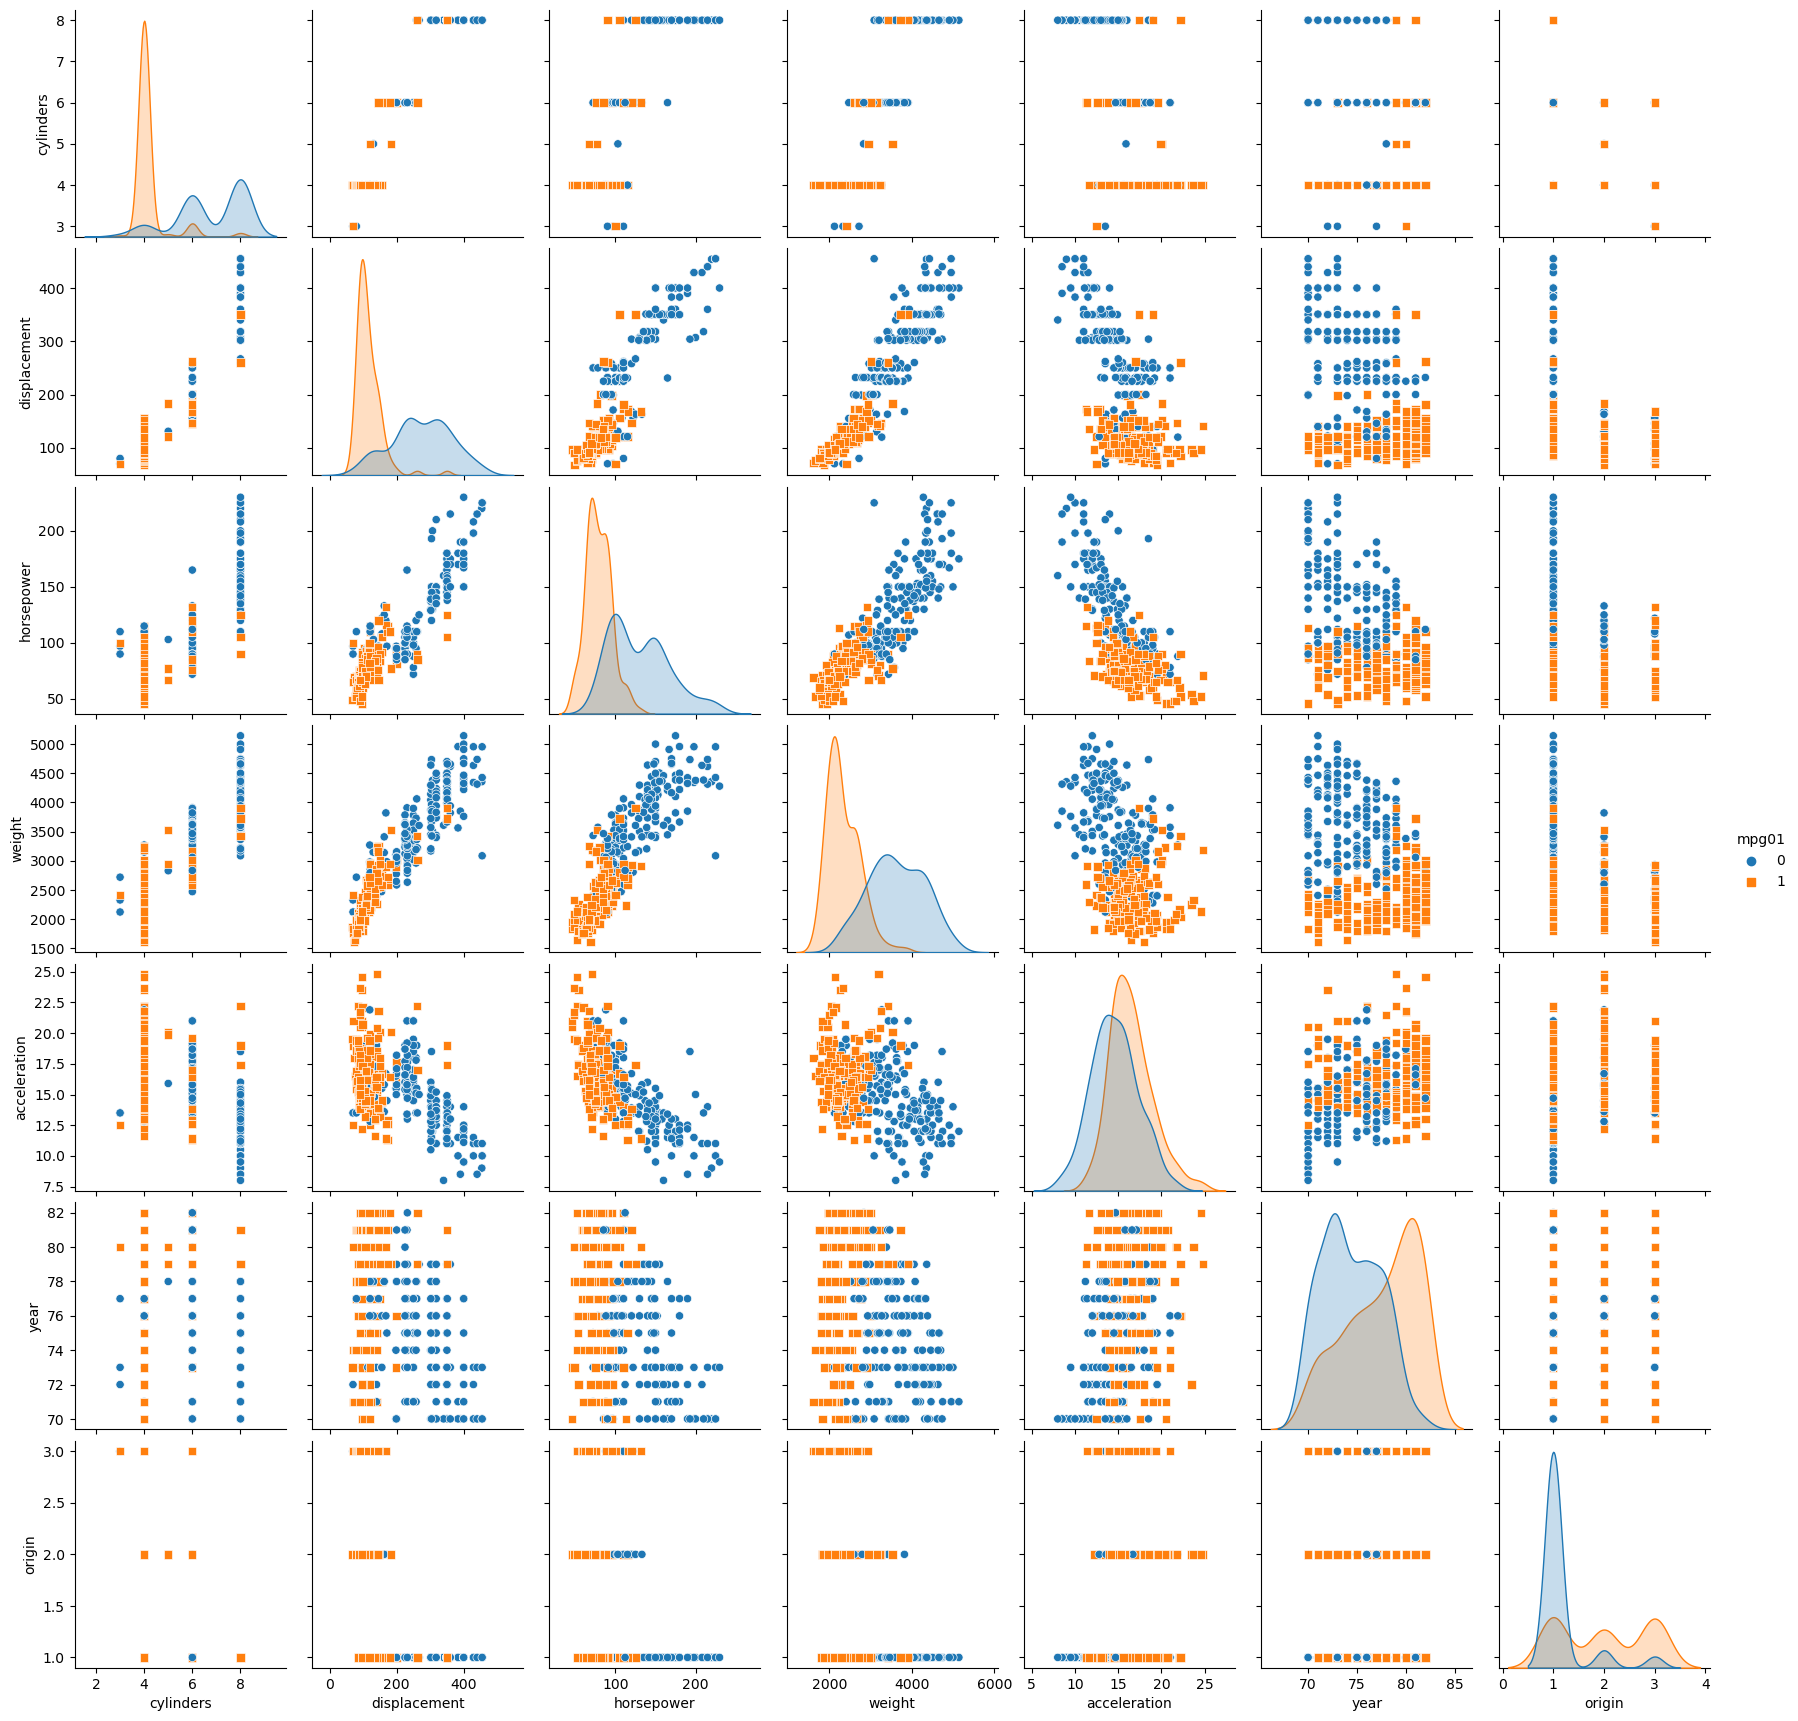

In [31]:
sns.pairplot(ProcessedAutoData, hue="mpg01", diag_kind='kde', markers=["o", "s"])

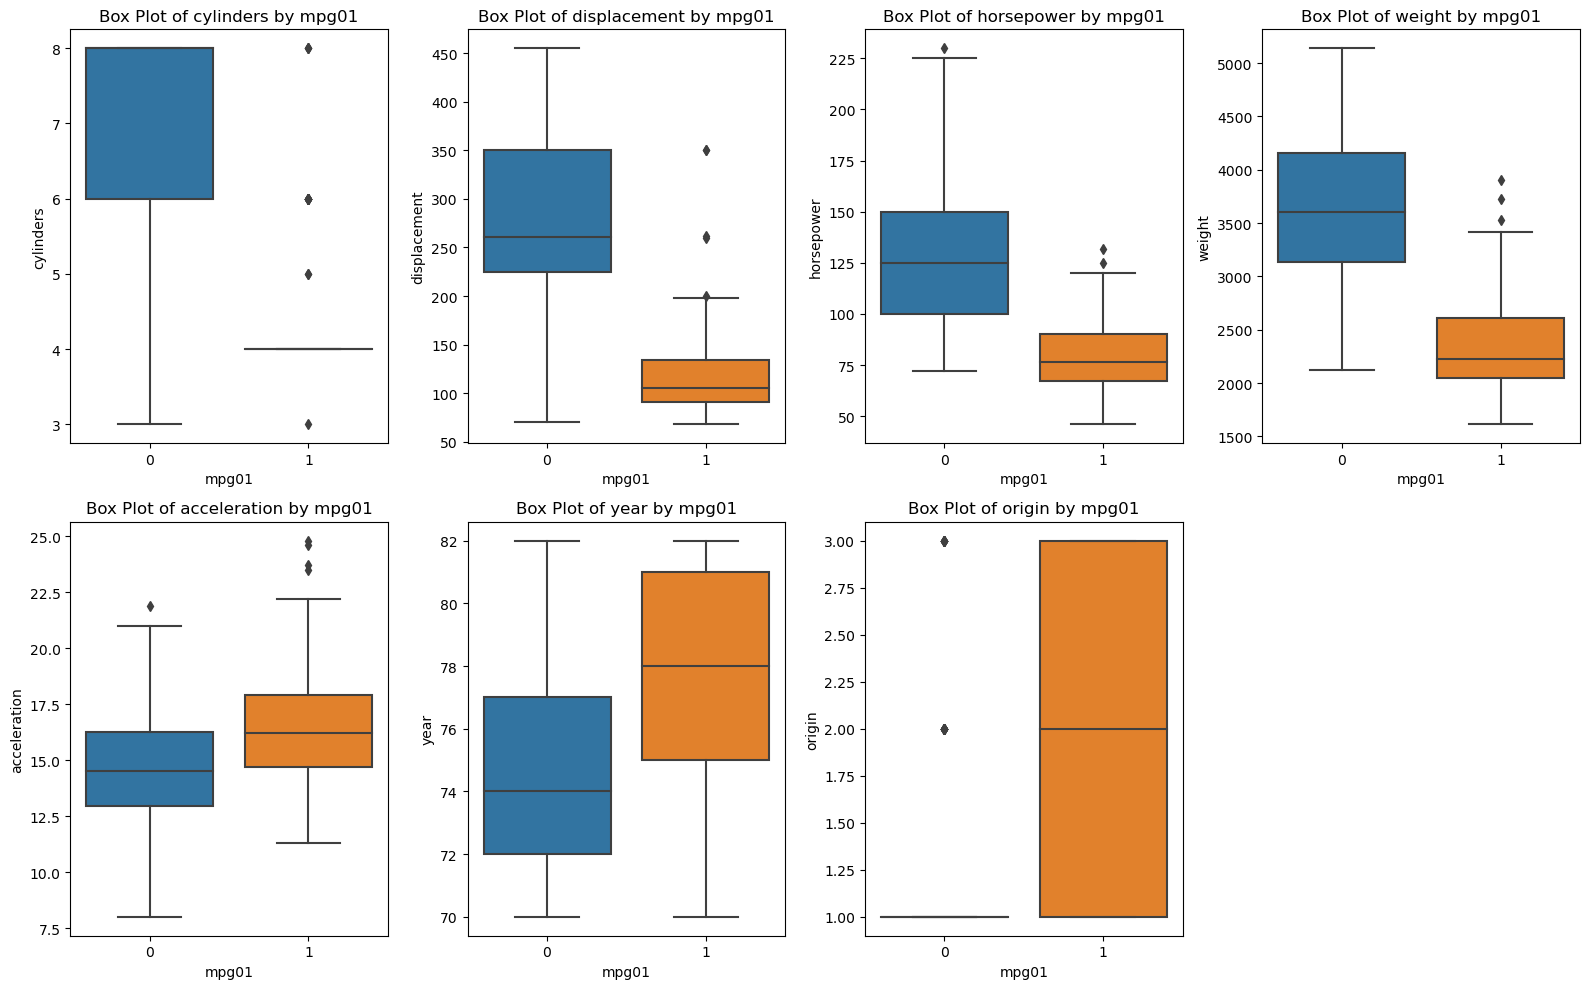

In [32]:
plt.figure(figsize=(16, 10))
numeric_columns = ProcessedAutoData.select_dtypes(include=[np.number]).columns[:-1]
for i, column in enumerate(numeric_columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x='mpg01', y=column, data=ProcessedAutoData)
    plt.title(f'Box Plot of {column} by mpg01')
plt.tight_layout()
plt.show()

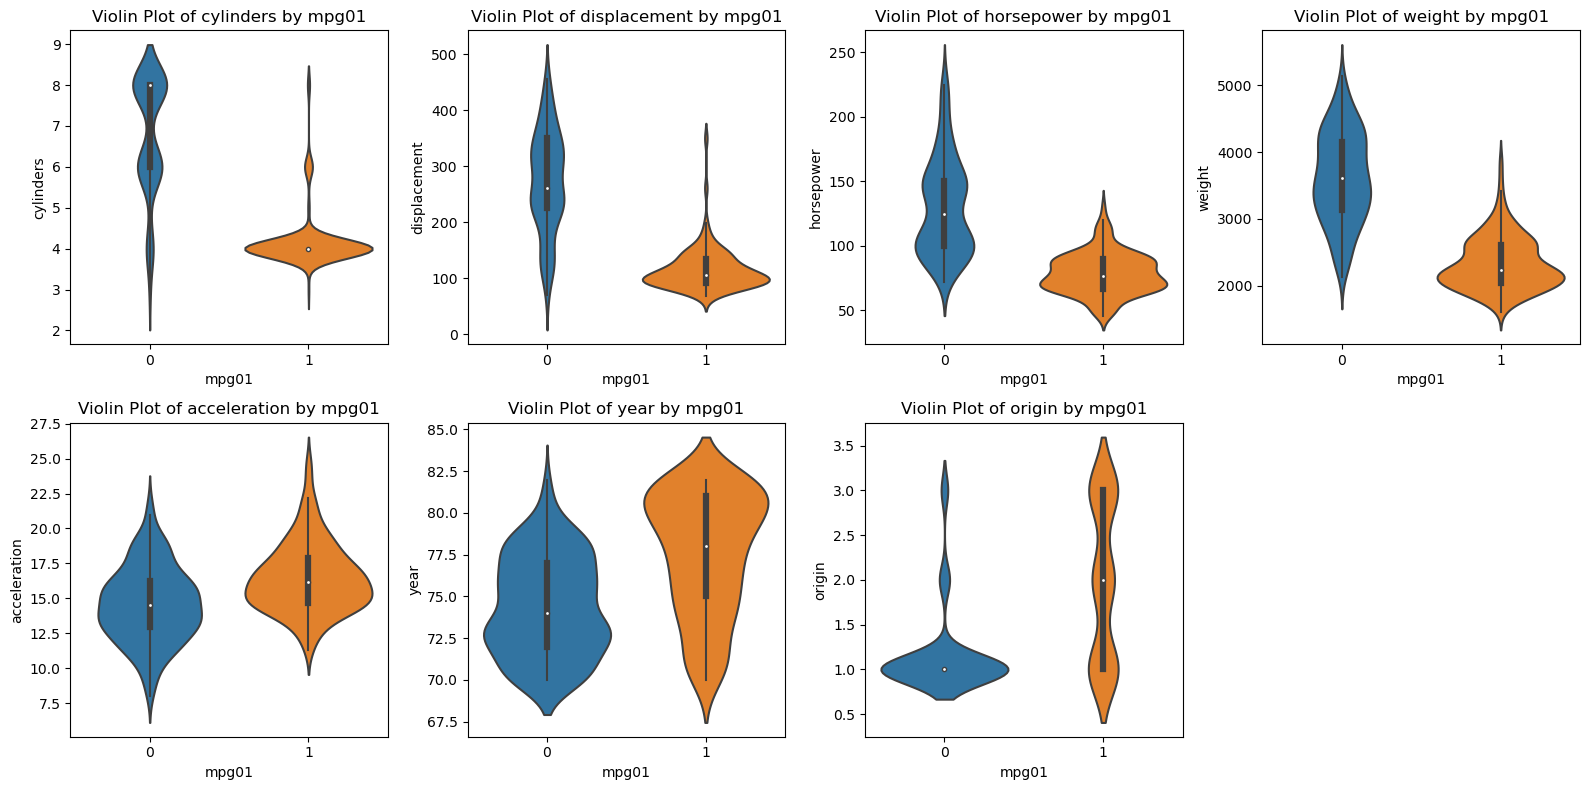

In [33]:
plt.figure(figsize=(16, 8))
numeric_columns = ProcessedAutoData.select_dtypes(include=[np.number]).columns[:-1]
for i, column in enumerate(numeric_columns):
    plt.subplot(2, 4, i + 1)
    sns.violinplot(x='mpg01', y=column, data=ProcessedAutoData)
    plt.title(f'Violin Plot of {column} by mpg01')

plt.tight_layout()
plt.show()

According to the graphical relation between mpg01 and other features above, features like cylinders, displacement, horsepower, weight are likely to be useful in predicting mpg01

#### C) Split the data into a training set and a test set (70%, 30%). Use `random.seed(4)` to make the training data reproducible.

Link to linear model: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [34]:
np.random.seed(4)
X = ProcessedAutoData.drop('mpg01', axis=1)
y = ProcessedAutoData['mpg01']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)



print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (274, 7)
X_test shape: (118, 7)
y_train shape: (274,)
y_test shape: (118,)


#### d) Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?



In [35]:
features = ['cylinders', 'displacement', 'horsepower', 'weight']

X_train_lda = X_train[features]
X_test_lda = X_test[features]

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_lda, y_train)
y_predLDA = lda.predict(X_test_lda)

accuracyLDA = accuracy_score(y_test, y_predLDA)
conf_matrix = confusion_matrix(y_test, y_predLDA)
error = 1 - accuracyLDA

In [36]:
print("LDA Model Accuracy: {:.2%}".format(accuracyLDA))
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nError Rate: {:.2%}".format(error))

LDA Model Accuracy: 88.14%

Confusion Matrix:
[[58  7]
 [ 7 46]]

Error Rate: 11.86%


#### e) Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?


In [37]:
features = ['cylinders', 'displacement', 'horsepower', 'weight']

X_train_qda = X_train[features]
X_test_qda = X_test[features]

QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train_qda, y_train)

y_predQDA = QDA.predict(X_test_qda)

accuracyQDA = accuracy_score(y_test, y_predQDA)
conf_matrix = confusion_matrix(y_test, y_predQDA)
error = 1 - accuracyQDA

In [38]:
print("QDA Model Accuracy: {:.2%}".format(accuracyQDA))
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nError Rate: {:.2%}".format(error))

QDA Model Accuracy: 88.14%

Confusion Matrix:
[[60  5]
 [ 9 44]]

Error Rate: 11.86%


#### f) Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

Link to linear model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [39]:
X_train_logreg = X_train[features]
X_test_logreg = X_test[features]
LogReg = LogisticRegression()
LogReg.fit(X_train_logreg, y_train)
y_predlogreg = LogReg.predict(X_test_logreg)

accuracyLR = accuracy_score(y_test, y_predlogreg)
conf_matrix_logreg = confusion_matrix(y_test, y_predlogreg)
error_logreg = 1 - accuracyLR

In [40]:
print("Logistic Regression Model Accuracy: {:.2%}".format(accuracyLR))
print("\nConfusion Matrix:")
print(conf_matrix_logreg)
print("\nError Rate: {:.2%}".format(error_logreg))

Logistic Regression Model Accuracy: 88.14%

Confusion Matrix:
[[58  7]
 [ 7 46]]

Error Rate: 11.86%
